# Signature Verification - 18CE095

### Please find the code below.

### Input-Output and Refrences can be found at the end.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
dtrain = pd.read_csv('train_data.csv')
dtrain.columns =['Image 1', 'Image 2', 'Forgery']
dtrain

,Image 1,Image 2,Forgery
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1
...,...,...,...
23200,031/02_031.png,031/03_031.png,0
23201,031/02_031.png,031/12_031.png,0
23202,031/02_031.png,031/11_031.png,0
23203,031/02_031.png,031/06_031.png,0


In [3]:
dtest = pd.read_csv('test_data.csv')
dtest.columns =['Image 1', 'Image 2', 'Forgery']
dtest

,Image 1,Image 2,Forgery
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1
...,...,...,...
5742,066/01_066.png,066/06_066.png,0
5743,066/01_066.png,066/08_066.png,0
5744,066/01_066.png,066/02_066.png,0
5745,066/01_066.png,066/05_066.png,0


In [4]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from scipy import ndimage
from skimage.measure import regionprops
from skimage import io
from skimage.filters import threshold_otsu   # For finding the threshold for grayscale to binary conversion
import tensorflow as tf
import pandas as pd
import numpy as np
from time import time
import keras

Using TensorFlow backend.


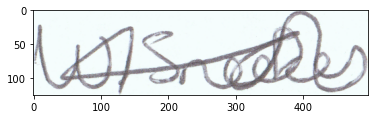

In [5]:
path = './train/' + '068/09_068.png'

img = mpimg.imread(path)

plt.imshow(img)
plt.show()

In [6]:
from skimage.color import rgb2gray

def greybin(img):
    # Converts grayscale to binary
    blur_radius = 0.8
    img = ndimage.gaussian_filter(img, blur_radius)  # to remove small components or noise
#     img = ndimage.binary_erosion(img).astype(img.dtype)
    thres = threshold_otsu(img)
    binimg = img > thres
    binimg = np.logical_not(binimg)
    return binimg

def preproc(path, img=None, display=True):
    if img is None:
        img = mpimg.imread(path)
    if display:
        plt.imshow(img)
        plt.show()
    grey = rgb2gray(img) #rgb to grey
    if display:
        plt.imshow(grey, cmap = matplotlib.cm.Greys_r)
        plt.show()
    binimg = greybin(grey) #grey to binary
    if display:
        plt.imshow(binimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    r, c = np.where(binimg==1)
    
    signimg = binimg[r.min(): r.max(), c.min(): c.max()]
    if display:
        plt.imshow(signimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    return signimg

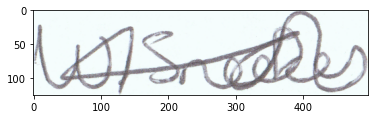

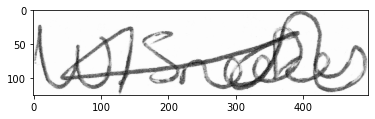

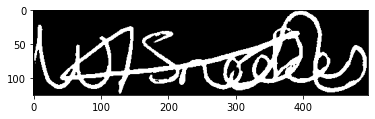

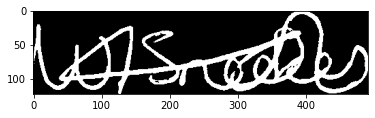

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
preproc(path)

In [8]:
def Ratio(img):
    a = 0
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                a = a+1
    total = img.shape[0] * img.shape[1]
    return a/total

In [9]:
def Centroid(img):
#     numOfWhites = 0
#     a = np.array([0,0])
#     for row in range(len(img)):
#         for col in range(len(img[0])):
#             if img[row][col]==True:
#                 b = np.array([row,col])
#                 a = np.add(a,b)
#                 print(a,b)
#                 numOfWhites += 1
    rowcols = np.array([img.shape[0], img.shape[1]])
#     centroid = a/numOfWhites
#     print("centroid",centroid)
    r = regionprops(img.astype("int8"))
    centroid = r[0].centroid
    centroid = centroid/rowcols
    return centroid[0], centroid[1]

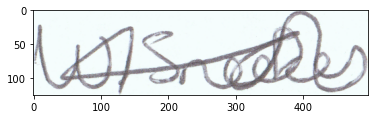

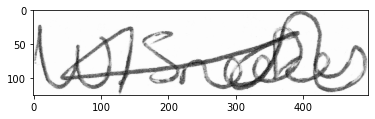

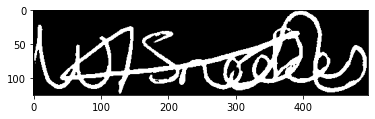

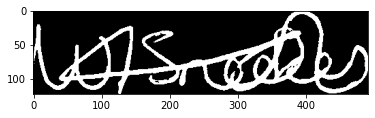

(0.6252338408898735, 0.5325170744710246)

In [10]:
img = preproc(path)
Centroid(img)

In [11]:
def EccentricitySolidity(img):
    r = regionprops(img.astype("int8"))
    return r[0].eccentricity, r[0].solidity

In [23]:
def SkewKurtosis(img):
    h,w = img.shape
    x = range(w)  # cols value
    y = range(h)  # rows value
#     print(h,w,x,y)
    #calculate projections along the x and y axes
    xp = np.sum(img,axis=0)
    yp = np.sum(img,axis=1)
    
#     print(xp,yp)# konsi axis pe kitne pixels hai
    
    #centroid
#     print(np.sum(x*xp))
    cx = np.sum(x*xp)/np.sum(xp)
    cy = np.sum(y*yp)/np.sum(yp)
#     print(cx,cy)
    
    #standard deviation
    x2 = (x-cx)**2
    y2 = (y-cy)**2
    sx = np.sqrt(np.sum(x2*xp)/np.sum(img))
    sy = np.sqrt(np.sum(y2*yp)/np.sum(img))
#     print("this",np.std(x2*xp)/h,sx)
    
    #skewness
    x3 = (x-cx)**3
    y3 = (y-cy)**3
    skewx = np.sum(xp*x3)/(np.sum(img) * sx**3)
    skewy = np.sum(yp*y3)/(np.sum(img) * sy**3)

    #Kurtosis
    x4 = (x-cx)**4
    y4 = (y-cy)**4
    # 3 is subtracted to calculate relative to the normal distribution
    kurtx = np.sum(xp*x4)/(np.sum(img) * sx**4) - 3
    kurty = np.sum(yp*y4)/(np.sum(img) * sy**4) - 3

    return (skewx , skewy), (kurtx, kurty)

In [13]:
train = pd.DataFrame(columns=['r1','c1x','c1y','e1','so1','s1x','s1y','k1x','k1y','r2','c2x','c2y','e2','so2','s2x','s2y','k2x','k2y','f'])
train

,r1,c1x,c1y,e1,so1,s1x,s1y,k1x,k1y,r2,c2x,c2y,e2,so2,s2x,s2y,k2x,k2y,f


In [ ]:
for i in dtrain.index:
    path = './train/' + dtrain['Image 1'][i]
    img = preproc(path,None,False)
    ratio = Ratio(img)
    centroid = Centroid(img)
    eccentricity, solidity = EccentricitySolidity(img)
    skewness, kurtosis = SkewKurtosis(img)
    
    path2 = './train/' + dtrain['Image 2'][i]
    img2 = preproc(path2,None,False)
    ratio2 = Ratio(img2)
    centroid2 = Centroid(img2)
    eccentricity2, solidity2 = EccentricitySolidity(img2)
    skewness2, kurtosis2 = SkewKurtosis(img2)
    
    forge = dtrain['Forgery'][i]
#     print(forge)
    
    
    row = {'r1': ratio, 'c1x': centroid[0],'c1y':centroid[1], 'e1': eccentricity,'so1':solidity,'s1x':skewness[0],'s1y':skewness[1],'k1x':kurtosis[0],'k1y':kurtosis[1],
           'r2': ratio2, 'c2x': centroid2[0],'c2y':centroid2[1], 'e2': eccentricity2,'so2':solidity2,'s2x':skewness2[0],'s2y':skewness2[1],'k2x':kurtosis2[0],'k2y':kurtosis2[1],
           'f':forge}
    
    train = train.append(row,ignore_index = True)
#     if i==3:
#         print('\n\n',train.head())
    print(i,end=',')
train.head()

In [87]:
train.to_csv('train.csv')

In [ ]:
test = pd.DataFrame(columns=['r1','c1x','c1y','e1','so1','s1x','s1y','k1x','k1y','r2','c2x','c2y','e2','so2','s2x','s2y','k2x','k2y','f'])

for i in dtest.index:
    path = './test/' + dtest['Image 1'][i]
    img = preproc(path,None,False)
    ratio = Ratio(img)
    centroid = Centroid(img)
    eccentricity, solidity = EccentricitySolidity(img)
    skewness, kurtosis = SkewKurtosis(img)
    
    path2 = './test/' + dtest['Image 2'][i]
    img2 = preproc(path2,None,False)
    ratio2 = Ratio(img2)
    centroid2 = Centroid(img2)
    eccentricity2, solidity2 = EccentricitySolidity(img2)
    skewness2, kurtosis2 = SkewKurtosis(img2)
    
    forge = dtest['Forgery'][i]
#     print(forge)
    
    
    row = {'r1': ratio, 'c1x': centroid[0],'c1y':centroid[1], 'e1': eccentricity,'so1':solidity,'s1x':skewness[0],'s1y':skewness[1],'k1x':kurtosis[0],'k1y':kurtosis[1],
           'r2': ratio2, 'c2x': centroid2[0],'c2y':centroid2[1], 'e2': eccentricity2,'so2':solidity2,'s2x':skewness2[0],'s2y':skewness2[1],'k2x':kurtosis2[0],'k2y':kurtosis2[1],
           'f':forge}
    
    test = test.append(row,ignore_index = True)
#     if i==3:
#         print('\n\n',train.head())
    print(i,end=',')
test.head()

In [89]:
test.to_csv('test.csv')

In [14]:
train2 = pd.read_csv('train.csv',index_col=0)
train2

,r1,c1x,c1y,e1,so1,s1x,s1y,k1x,k1y,r2,c2x,c2y,e2,so2,s2x,s2y,k2x,k2y,f
0,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.171436,0.448588,0.519046,0.963608,0.222913,-0.104717,0.009543,-1.184102,-0.190807,1.0
1,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.155018,0.493676,0.553124,0.978196,0.196333,-0.218603,-0.382478,-1.275182,-0.645806,1.0
2,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.138833,0.555147,0.546930,0.976092,0.183620,-0.372245,-0.357054,-1.247185,-0.165678,1.0
3,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.155300,0.429801,0.542143,0.973192,0.188445,-0.177166,0.060673,-1.248836,-0.566794,1.0
4,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.102185,0.524729,0.553520,0.974272,0.136366,-0.296774,-0.058867,-1.341176,-0.207266,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23215,0.163353,0.498526,0.442628,0.970378,0.228102,0.204676,0.354780,-1.171567,-0.773905,0.185715,0.480732,0.436852,0.970736,0.246273,0.357458,0.210616,-1.043471,-0.775011,0.0
23216,0.163353,0.498526,0.442628,0.970378,0.228102,0.204676,0.354780,-1.171567,-0.773905,0.145592,0.546018,0.433911,0.972953,0.203782,0.315756,0.045682,-1.051901,-0.353038,0.0
23217,0.163353,0.498526,0.442628,0.970378,0.228102,0.204676,0.354780,-1.171567,-0.773905,0.150324,0.446886,0.451272,0.965021,0.205243,0.221518,0.498290,-1.208378,-0.418821,0.0
23218,0.163353,0.498526,0.442628,0.970378,0.228102,0.204676,0.354780,-1.171567,-0.773905,0.131772,0.508317,0.539008,0.978954,0.205831,0.149608,0.153007,-0.932907,-1.084859,0.0


In [15]:
train2['f'] = train2['f'].astype(int)
train2

,r1,c1x,c1y,e1,so1,s1x,s1y,k1x,k1y,r2,c2x,c2y,e2,so2,s2x,s2y,k2x,k2y,f
0,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.171436,0.448588,0.519046,0.963608,0.222913,-0.104717,0.009543,-1.184102,-0.190807,1
1,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.155018,0.493676,0.553124,0.978196,0.196333,-0.218603,-0.382478,-1.275182,-0.645806,1
2,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.138833,0.555147,0.546930,0.976092,0.183620,-0.372245,-0.357054,-1.247185,-0.165678,1
3,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.155300,0.429801,0.542143,0.973192,0.188445,-0.177166,0.060673,-1.248836,-0.566794,1
4,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.102185,0.524729,0.553520,0.974272,0.136366,-0.296774,-0.058867,-1.341176,-0.207266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23215,0.163353,0.498526,0.442628,0.970378,0.228102,0.204676,0.354780,-1.171567,-0.773905,0.185715,0.480732,0.436852,0.970736,0.246273,0.357458,0.210616,-1.043471,-0.775011,0
23216,0.163353,0.498526,0.442628,0.970378,0.228102,0.204676,0.354780,-1.171567,-0.773905,0.145592,0.546018,0.433911,0.972953,0.203782,0.315756,0.045682,-1.051901,-0.353038,0
23217,0.163353,0.498526,0.442628,0.970378,0.228102,0.204676,0.354780,-1.171567,-0.773905,0.150324,0.446886,0.451272,0.965021,0.205243,0.221518,0.498290,-1.208378,-0.418821,0
23218,0.163353,0.498526,0.442628,0.970378,0.228102,0.204676,0.354780,-1.171567,-0.773905,0.131772,0.508317,0.539008,0.978954,0.205831,0.149608,0.153007,-0.932907,-1.084859,0


In [16]:
train2.describe()

,r1,c1x,c1y,e1,so1,s1x,s1y,k1x,k1y,r2,c2x,c2y,e2,so2,s2x,s2y,k2x,k2y,f
count,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000
mean,0.102167,0.511000,0.452119,0.928879,0.167432,0.218419,-0.100872,-0.709303,-0.233410,0.096735,0.512798,0.452150,0.933495,0.155240,0.217605,-0.084027,-0.746233,-0.261460,0.457278
std,0.045879,0.066017,0.061920,0.077003,0.059181,0.357865,0.470810,0.567406,0.771406,0.040790,0.066020,0.058288,0.065240,0.054216,0.342552,0.460766,0.569520,0.702364,0.498182
min,0.025067,0.314238,0.259200,0.287296,0.051675,-0.812190,-1.915435,-1.501442,-1.410660,0.025067,0.302786,0.248994,0.287296,0.051675,-1.376979,-1.915435,-1.501442,-1.518835,0.000000
25%,0.073147,0.467028,0.418110,0.911141,0.129498,-0.003216,-0.405448,-1.120068,-0.711062,0.070829,0.467048,0.417099,0.915839,0.120114,0.002390,-0.393487,-1.124072,-0.712186,0.000000
50%,0.093656,0.508993,0.461834,0.950136,0.156313,0.152296,-0.060355,-0.875678,-0.385670,0.089546,0.509334,0.460226,0.949580,0.145760,0.162450,-0.054714,-0.919749,-0.410420,0.000000
75%,0.120638,0.554535,0.495020,0.980448,0.197420,0.406509,0.245432,-0.439672,0.023014,0.113007,0.556086,0.492889,0.976092,0.181512,0.412679,0.248759,-0.534920,0.014795,1.000000
max,0.299739,0.701721,0.622081,0.996357,0.437721,1.688024,1.018463,2.781394,6.685063,0.299739,0.705254,0.622081,0.997020,0.437721,1.688024,1.512707,6.583726,6.685063,1.000000


In [18]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal', input_dim=18))
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(25, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [20]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [21]:
x_train = train2.drop(['f'],axis=1)
y_train = train2['f']

In [22]:
classifier.fit(x_train,y_train, batch_size=64, epochs=100,verbose=1)


Epoch 1/100
23220/23220 [==============================] - 1s 33us/step - loss: 0.6593 - accuracy: 0.5933
Epoch 2/100
23220/23220 [==============================] - 0s 21us/step - loss: 0.5661 - accuracy: 0.7356
Epoch 3/100
23220/23220 [==============================] - 0s 21us/step - loss: 0.5203 - accuracy: 0.7692
Epoch 4/100
23220/23220 [==============================] - 0s 21us/step - loss: 0.4638 - accuracy: 0.7903
Epoch 5/100
23220/23220 [==============================] - 0s 21us/step - loss: 0.4273 - accuracy: 0.8053
Epoch 6/100
23220/23220 [==============================] - 0s 21us/step - loss: 0.4085 - accuracy: 0.8183
Epoch 7/100
23220/23220 [==============================] - 1s 22us/step - loss: 0.3972 - accuracy: 0.8223
Epoch 8/100
23220/23220 [==============================] - 0s 21us/step - loss: 0.3891 - accuracy: 0.8259
Epoch 9/100
23220/23220 [==============================] - 0s 21us/step - loss: 0.3738 - accuracy: 0.8338
Epoch 10/100
23220/23220 [===================

In [24]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

23220/23220 [==============================] - 0s 17us/step


[0.08546988846745873, 0.9692506194114685]

In [25]:
test2 = pd.read_csv('test.csv',index_col=0)
test2['f'] = test2['f'].astype('int')
test2

,r1,c1x,c1y,e1,so1,s1x,s1y,k1x,k1y,r2,c2x,c2y,e2,so2,s2x,s2y,k2x,k2y,f
0,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.171436,0.448588,0.519046,0.963608,0.222913,-0.104717,0.009543,-1.184102,-0.190807,1
1,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.155018,0.493676,0.553124,0.978196,0.196333,-0.218603,-0.382478,-1.275182,-0.645806,1
2,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.138833,0.555147,0.546930,0.976092,0.183620,-0.372245,-0.357054,-1.247185,-0.165678,1
3,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.155300,0.429801,0.542143,0.973192,0.188445,-0.177166,0.060673,-1.248836,-0.566794,1
4,0.208333,0.625234,0.532517,0.981067,0.243212,-0.260725,-0.642539,-1.169934,-0.307431,0.102185,0.524729,0.553520,0.974272,0.136366,-0.296774,-0.058867,-1.341176,-0.207266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,0.085429,0.611747,0.559575,0.915688,0.145664,-0.294146,-0.802758,-0.756408,-0.230225,0.057914,0.497207,0.551142,0.695521,0.091666,-0.615949,0.148469,-0.238215,-0.415119,0
5743,0.085429,0.611747,0.559575,0.915688,0.145664,-0.294146,-0.802758,-0.756408,-0.230225,0.070090,0.458495,0.590477,0.683584,0.108578,-0.601994,0.353616,-0.001347,-1.129748,0
5744,0.085429,0.611747,0.559575,0.915688,0.145664,-0.294146,-0.802758,-0.756408,-0.230225,0.073578,0.535719,0.616030,0.864475,0.117952,-0.812190,-0.180832,0.484833,-0.826415,0
5745,0.085429,0.611747,0.559575,0.915688,0.145664,-0.294146,-0.802758,-0.756408,-0.230225,0.063550,0.532167,0.612525,0.909098,0.097526,-0.645848,-0.389231,-0.269985,-0.266669,0


In [26]:
x_test = test2.drop(['f'],axis=1)
y_test = test2['f']

In [27]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.02436852813793066

In [29]:
y_pred

,0
0,9.926476e-01
1,9.987524e-01
2,9.925621e-01
3,9.998888e-01
4,9.999955e-01
...,...
5742,1.237452e-03
5743,8.702278e-06
5744,8.313522e-08
5745,1.897617e-05


In [28]:
y_pred = pd.DataFrame(y_pred)
res = pd.concat([y_test,y_pred],axis=1)
res

,f,0
0,1,9.926476e-01
1,1,9.987524e-01
2,1,9.925621e-01
3,1,9.998888e-01
4,1,9.999955e-01
...,...,...
5742,0,1.237452e-03
5743,0,8.702278e-06
5744,0,8.313522e-08
5745,0,1.897617e-05


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred_c = (y_pred>0.5)
y_pred_c
print(accuracy_score(y_pred_c,y_test))
confusion_matrix(y_pred_c,y_test)

0.9678092918044197


array([[2672,   85],
       [ 100, 2890]], dtype=int64)

In [57]:
classifier.save('ann')

In [53]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.


#     print(b.files) # Print the list of files selected.

fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

In [54]:
files = fileselect.files
file1 = files[0]
print(file1)
fileselect = Button(description="File select")
fileselect.on_click(select_files)
display(fileselect)

In [55]:
files = fileselect.files
file2 = files[0]
print(file2)

C:/Users/Yogesh/Desktop/sign_data/test/069_forg/01_0106069.PNG


In [37]:
def test(file1=file1,file2=file2):
    tester = pd.DataFrame(columns=['r1','c1x','c1y','e1','so1','s1x','s1y','k1x','k1y','r2','c2x','c2y','e2','so2','s2x','s2y','k2x','k2y'])

    path = file1
    print('Image 1')
    img = preproc(path,None,True)
    ratio = Ratio(img)
    centroid = Centroid(img)
    eccentricity, solidity = EccentricitySolidity(img)
    skewness, kurtosis = SkewKurtosis(img)

    path2 = file2
    print('Image 2')
    img2 = preproc(path2,None,True)
    ratio2 = Ratio(img2)
    centroid2 = Centroid(img2)
    eccentricity2, solidity2 = EccentricitySolidity(img2)
    skewness2, kurtosis2 = SkewKurtosis(img2)

    row = {'r1': ratio, 'c1x': centroid[0],'c1y':centroid[1], 'e1': eccentricity,'so1':solidity,'s1x':skewness[0],'s1y':skewness[1],'k1x':kurtosis[0],'k1y':kurtosis[1],
            'r2': ratio2, 'c2x': centroid2[0],'c2y':centroid2[1], 'e2': eccentricity2,'so2':solidity2,'s2x':skewness2[0],'s2y':skewness2[1],'k2x':kurtosis2[0],'k2y':kurtosis2[1],
            }

    tester = tester.append(row,ignore_index=True)

    p = classifier.predict(tester)

    print(p)

Image 1


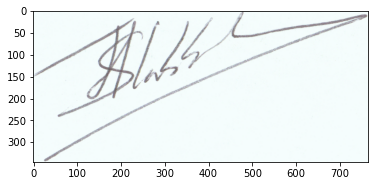

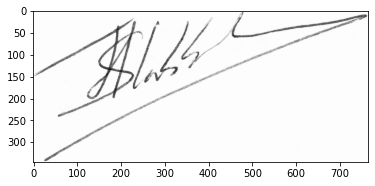

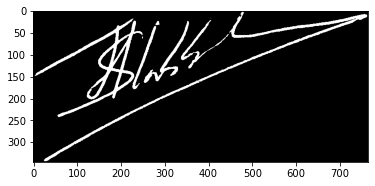

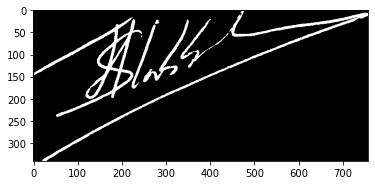

Image 2


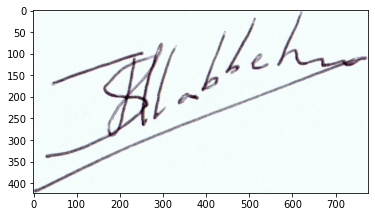

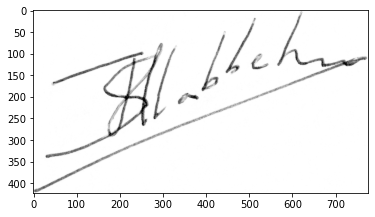

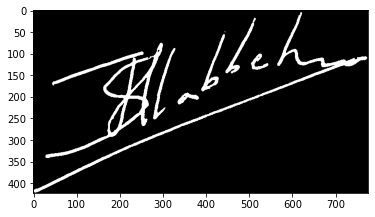

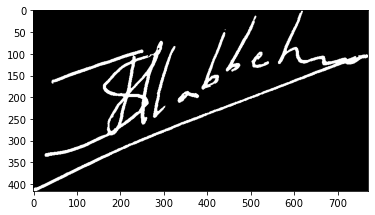

[[0.8993236]]


In [38]:
test()

Image 1


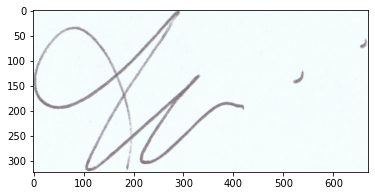

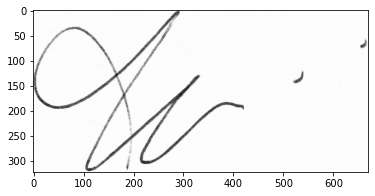

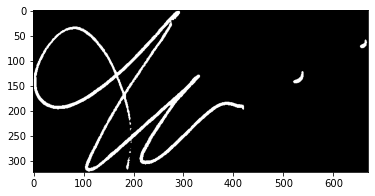

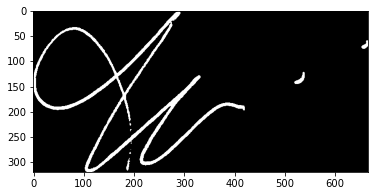

Image 2


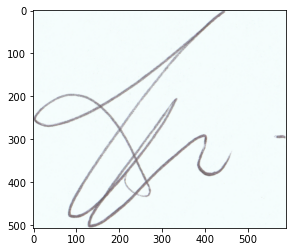

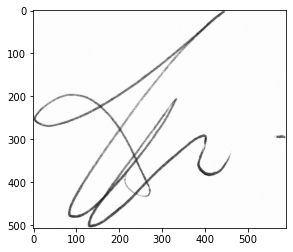

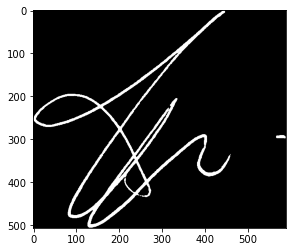

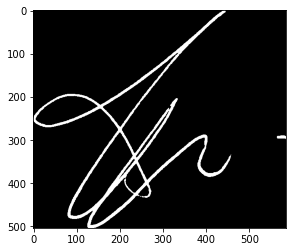

[[0.00558075]]


In [47]:
test(file1,file2)

Image 1


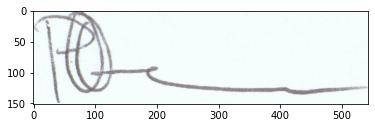

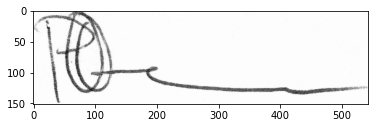

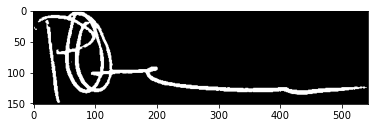

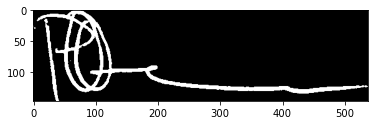

Image 2


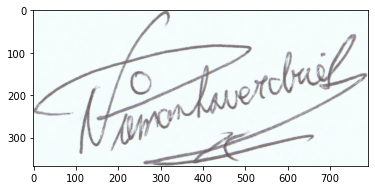

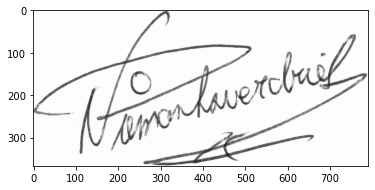

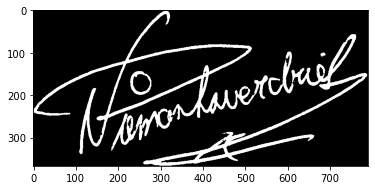

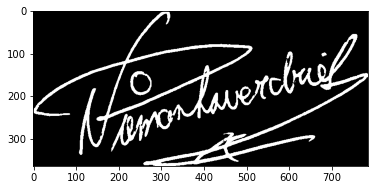

[[0.9999633]]


In [51]:
test(file1,file2)

Image 1


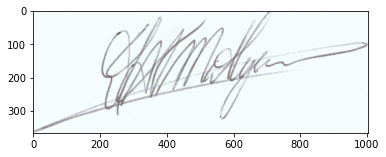

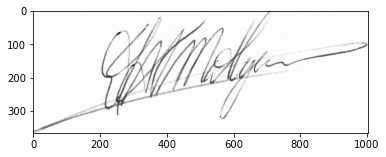

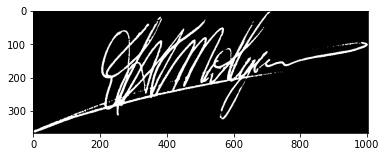

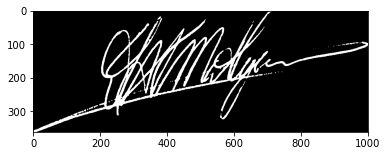

Image 2


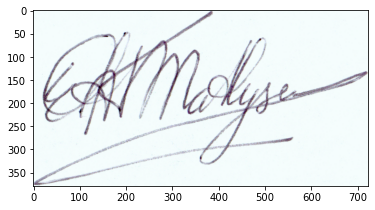

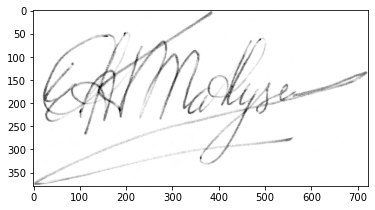

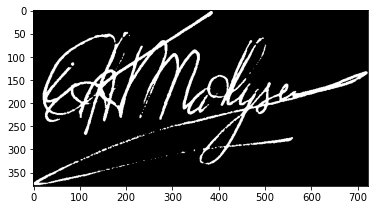

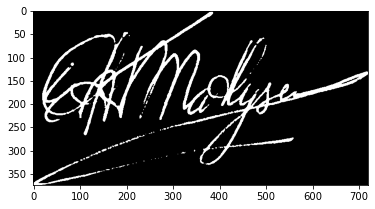

[[0.9999937]]


In [56]:
test(file1,file2)

### Here the value represents forgery.  closer to one indicates the image is forged whereas closer to zero indicates image is genuine.

## Refrences:

- https://ieeexplore.ieee.org/document/7507937
- http://www.iosrjournals.org/iosr-jece/papers/Vol.%2013%20Issue%203/Version-3/J1303035359.pdf
- https://www.ijream.org/papers/SSJ2019010.pdf
- https://github.com/Harshitb1/AxisBankAiChallenge